## Palla Revanth

## 20MAI0046

## KMeans Clustering

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import style
style.use('ggplot')

In [3]:
class K_Means:
    def __init__(self, k=2, tol=0.001, max_iter=300):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter
        
    def fit(self, data):
        self.centroids = {}
        for i in range(self.k):
            self.centroids[i] = data[i]
        for i in range(self.max_iter):
            self.classifications = {}
            for i in range(self.k):
                self.classifications[i] = []
            for featureset in data:
                distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)
                
            prev_centroids = dict(self.centroids)
            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification],axis=0)
            optimized = True
            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.sum((current_centroid-original_centroid)/original_centroid*100.0) > self.tol:
                    #print(np.sum((current_centroid-original_centroid)/original_centroid*100.0))
                    optimized = False
            if optimized:
                break
            
    def predict(self,data):
        distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification

### Take sample (x,y) coordinate to test the above build model

In [5]:
X = np.array([[1,2],
              [1.5,8],
              [5,8],
              [8,8],
              [1,0.6],
              [9,11]]
             )

In [6]:
## Testing the Model
model = K_Means()
model.fit(X)

301.04166666666663


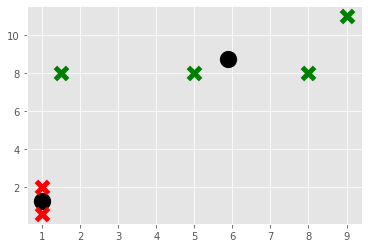

In [20]:
colors = 10*["r", "g", "c", "b", "k"]
for centroid in model.centroids:
    plt.scatter(model.centroids[centroid][0], model.centroids[centroid][1],
                marker="o", color="k", s=150, linewidths=5)

for classification in model.classifications:
    color = colors[classification]
    for featureset in model.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], marker="x", color=color, s=150, linewidths=5)

plt.show()

### Read the csv file and form cluster

In [21]:
import pandas as pd
df = pd.read_csv('S:/WInterSem/ML_Techniques/Mall_Customers.csv', index_col='CustomerID')

In [22]:
df.head()

,Genre,Age,Annual_Income_(k$),Spending_Score
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [23]:
print(df.isnull().sum())
print(df.drop_duplicates(inplace=True))

Genre                 0
Age                   0
Annual_Income_(k$)    0
Spending_Score        0
dtype: int64
None


In [24]:
X = df.iloc[:, [2, 3]].values

In [25]:
km = K_Means(5)
km.fit(X)

153.79972565157746
395.1388888888889
325.1043599257885
248.47839135654266
22.56410256410257
62.69598095187782
33.137241230781605
5.339844727017936
20.6651128086059
1.2260451171988616


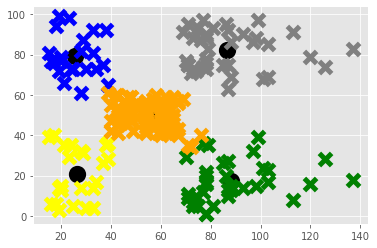

In [29]:
colors = 10*["yellow", "blue", "green", "grey", "orange"]
for centroid in km.centroids:
    plt.scatter(km.centroids[centroid][0], km.centroids[centroid][1],
                marker="o", color="k", s=150, linewidths=5)

for classification in km.classifications:
    color = colors[classification]
    for featureset in km.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], marker="x", color=color, s=150, linewidths=5)

plt.show()

## KMode Clustering

### Dataset: https://archive.ics.uci.edu/ml/datasets/bank+marketing

In [1]:
# supress warnings
import warnings
warnings.filterwarnings('ignore')

# Importing all required packages
import numpy as np
import pandas as pd

# Data viz lib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.pyplot import xticks

In [4]:
bank = pd.read_csv('S:/WInterSem/ML_Techniques/All_labs/LastExperiment/bankmarketing.csv')

In [5]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [7]:
## Importing categorical columns
bank_cust = bank[['age','job', 'marital', 'education', 'default', 'housing', 'loan','contact','month','day_of_week','poutcome']]

In [8]:
bank_cust.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent
2,37,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent
4,56,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent


In [9]:
# Converting age into categorical variable
bank_cust['age_bin'] = pd.cut(bank_cust['age'], [0, 20, 30, 40, 50, 60, 70, 80, 90, 100], 
                              labels=['0-20', '20-30', '30-40', '40-50','50-60','60-70','70-80', '80-90','90-100'])
bank_cust  = bank_cust.drop('age',axis = 1)

In [10]:
bank_cust.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age_bin
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,50-60
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,50-60
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,30-40
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,30-40
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,50-60


In [11]:
bank_cust.shape

(41188, 11)

In [12]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
bank_cust = bank_cust.apply(le.fit_transform)
bank_cust.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age_bin
0,3,1,0,0,0,0,1,6,1,1,4
1,7,1,3,1,0,0,1,6,1,1,4
2,7,1,3,0,2,0,1,6,1,1,2
3,0,1,1,0,0,0,1,6,1,1,2
4,7,1,3,0,0,2,1,6,1,1,4


### KMode Centroid and mode calculation

In [23]:
def pickup_centroids(df,k):
    centroids_idx = np.random.choice(a = df.index.values, replace = False, size = k)
    centroid_a = df.loc[centroids_idx[0]].values
    centroid_b = df.loc[centroids_idx[1]].values
    return(centroid_a,centroid_b)

def distance_mismatch(a,b):
    return (a != b).sum()

def compute_distances_to_centroids(centroid_a,centroid_b,df):
    
    dic_distances = {}
    for idx,row in df.iterrows():
        candidat = row.values
        distance_to_a = distance_mismatch(candidat[:-1],centroid_a[:-1])
        distance_to_b = distance_mismatch(candidat[:-1],centroid_b[:-1])
        affectation = np.argmin([distance_to_a,distance_to_b])
        dic_distances[idx] = {"distance_to_a" : distance_to_a,
                              "distance_to_b" : distance_to_b,
                              "cluster" : affectation}
        
    return dic_distances


def extract_assigned_data(dic_distances,df):
    c1list = []
    c2list = []
    for k,v in dic_distances.items():
        if v["cluster"] == 0:
            c1list.append(df.loc[k].values)
        else:
            c2list.append(df.loc[k].values)

    if len(c1list)>0:
        a = np.vstack(c1list)
    else:
        a = np.array([])
        
    if len(c2list)>0:
        b = np.vstack(c2list)
    else:
        b = np.array([])
        
    return a,b


def compute_mode(array):
    return stats.mode(array)[0][0]


def compute_performance(dic_distances):
    
    distances_list = []
    for k,v in dic_distances.items():
        if v["cluster"] == 0:
            distances_list.append(v["distance_to_a"])
        else:
            distances_list.append(v["distance_to_b"])
    return (np.array(distances_list)).sum()

### KMode Logic

In [27]:
from scipy import stats

In [31]:
%%timeit
def kmodes(df,k=2,threshold=1,iterations=5, verbose = True): 
    dic_results = {}  
    centroid_a,centroid_b = pickup_centroids(df,k)
    for i in range(iterations):
        if verbose:
            print("iteration : ",i)

            dic_distances = compute_distances_to_centroids(centroid_a,centroid_b,df)
            array_a,array_b = extract_assigned_data(dic_distances,df)
            mycdt = len(array_a)==0 or len(array_b)==0

            if mycdt:
                continue

            futur_centroid_a = compute_mode(array_a)
            futur_centroid_b = compute_mode(array_b)

            print('iteration : ' + str(i) + ' - complete')
            d = distance_mismatch(futur_centroid_a,centroid_a) + distance_mismatch(futur_centroid_b,centroid_b)

            if verbose:
                print("distance between present and new centroids : ", d)

            if d<threshold:
                break
      
            centroid_a = futur_centroid_a
            centroid_b = futur_centroid_b
                 
    print("Total elements in cluster 1 " + str(len(array_a)))
    print("Total elements in cluster 2 " + str(len(array_b)))

    df_pred = df.copy()
    df_pred['pred_cluster'] = pd.Series(np.random.randn(len(df)), index=df_pred.index)
    for idx,row in df_pred.iterrows():
        df_pred.iloc[idx,-1] = dic_distances[idx]['cluster']

    return df_pred

def main():
    df = kmodes(bank_cust, verbose = True)
    print(df.head())
    return df

kmodes_clsuter_df = main()
kmodes_clsuter_df['age_bin_pred'] = kmodes_clsuter_df['age_bin'].astype('float16')

iteration :  0
iteration : 0 - complete
distance between present and new centroids :  10
iteration :  1
iteration : 1 - complete
distance between present and new centroids :  0
Total elements in cluster 1 22887
Total elements in cluster 2 18301
   job  marital  education  default  housing  loan  contact  month  \
0    3        1          0        0        0     0        1      6   
1    7        1          3        1        0     0        1      6   
2    7        1          3        0        2     0        1      6   
3    0        1          1        0        0     0        1      6   
4    7        1          3        0        0     2        1      6   

   day_of_week  poutcome  age_bin  pred_cluster  
0            1         1        4           0.0  
1            1         1        4           0.0  
2            1         1        2           0.0  
3            1         1        2           0.0  
4            1         1        4           0.0  
iteration :  0
iteration : 0 - com